In [1]:
import os
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Needed Functions

In [2]:
def diff_two_w2v_all_nei(m1, m2, num_words):
    # pick common words between two embeddings and sort them
    common_vocab = set(m1.wv.vocab.keys())&set(m2.wv.vocab.keys())
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # convert gensim w2v to numpy array
    m1_np = np.zeros((num_words, 300))
    m2_np = np.zeros((num_words, 300))
    
    for i in range(num_words):
        vec = m1.wv[common_vocab[i]]
        m1_np[i] = vec
        vec = m2.wv[common_vocab[i]]
        m2_np[i] = vec
        
    # each vector represent a relationship between a word and all the other words + the word itself
    cosim_m1 = cosine_similarity(m1_np, m1_np)
    cosim_m2 = cosine_similarity(m2_np, m2_np)
    
    sem_diff = []
    
    for i in range(num_words):
        sem_diff.append(cosine_similarity(cosim_m1[i].reshape(1, -1), cosim_m2[i].reshape(1, -1))[0][0])
        
    return sem_diff, common_vocab

In [3]:
def closest_word_in_other_model(m1, m2, word, num_words):
    # pick common words between two embeddings and sort them
    common_vocab = set(m1.wv.vocab.keys())&set(m2.wv.vocab.keys())
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # convert gensim w2v to numpy array
    m1_np = np.zeros((num_words, 300))
    m2_np = np.zeros((num_words, 300))
    
    for i in range(num_words):
        vec = m1.wv[common_vocab[i]]
        m1_np[i] = vec
        vec = m2.wv[common_vocab[i]]
        m2_np[i] = vec
        
    # each vector represent a relationship between a word and all the other words + the word itself
    cosim_m1 = cosine_similarity(m1_np, m1_np)
    cosim_m2 = cosine_similarity(m2_np, m2_np)
    
    sem_diff = []
    
    word_neighbor_in_m1 = cosim_m1[common_vocab.index(word)]
    
    closest_word_in_m2_index = 0
    max_sim = 0

    for i in range(num_words):
        sim = cosine_similarity(word_neighbor_in_m1.reshape(1, -1), cosim_m2[i].reshape(1, -1))[0][0]
        if max_sim < sim:
            closest_word_in_m2_index = i
            max_sim = sim
    
    return common_vocab[closest_word_in_m2_index], max_sim

In [4]:
def most_diff_words(sem_diff, common_vocab, num):
    most_diff_words = sorted(range(len(sem_diff)), key=lambda i: sem_diff[i], reverse=False)

    print("Top", num, "most changing word: ")
    count = 0
    for i in most_diff_words:
        print(common_vocab[i], end = ' ')
        count += 1
        if count > num:
            break
            
    print("\n")
    return most_diff_words

# Window size 5: Most changed words

In [6]:
year = '2001-2019'

m6 = Word2Vec.load('300d_5win\\300d_5winlipad'+year+'.bin')

year = '1981-2000'

m5 = Word2Vec.load('300d_5win\\300d_5winlipad'+year+'.bin')

year = '1961-1980'

m4 = Word2Vec.load('300d_5win\\300d_5winlipad'+year+'.bin')

year = '1941-1960'

m3 = Word2Vec.load('300d_5win\\300d_5winlipad'+year+'.bin')

year = '1921-1940'

m2 = Word2Vec.load('300d_5win\\300d_5winlipad'+year+'.bin')

year = '1901-1920'

m1 = Word2Vec.load('300d_5win\\300d_5winlipad'+year+'.bin')

In [9]:
num_words = 3000
diff_list = []

sem_diff, common_vocab = diff_two_w2v_all_nei(m1, m6, num_words)
changed_words_5_win = most_diff_words(sem_diff, common_vocab, 10)
diff_list.append(sum(sem_diff)/len(sem_diff))

Top 100 most changing word: 
programs goals basically significantly foster con currently venture overall addresses ret quebeckers transparency major dot challenges govt expertise gst x nay softwood ans terrorists fielding cor accord splitting supplement choices rep sponsorship mps afghan agenda c regulatory com ac gender ei ms sector cois content offshore re un refugee accountability criteria priority sustainable meaningful address internationally f innovation allocation somehow amt implementation impaired res processing balanced approach secondary works sentencing funded freedoms essentially impact bloc harper today steamers target cuts targets et marie her values greenhouse current transparent round imperial trans madam ques guard ban inside w terms equalization funding shape 



# Window size 20: Most changed words

In [12]:
year = '2001-2019'

m6 = Word2Vec.load('300d_20win\\lipad'+year+'.bin')

year = '1981-2000'

m5 = Word2Vec.load('300d_20win\\lipad'+year+'.bin')

year = '1961-1980'

m4 = Word2Vec.load('300d_20win\\lipad'+year+'.bin')

year = '1941-1960'

m3 = Word2Vec.load('300d_20win\\lipad'+year+'.bin')

year = '1921-1940'

m2 = Word2Vec.load('300d_20win\\lipad'+year+'.bin')

year = '1901-1920'

m1 = Word2Vec.load('300d_20win\\lipad'+year+'.bin')

In [6]:
num_words = 3000
diff_list = []

sem_diff, common_vocab = diff_two_w2v_all_nei(m1, m6, num_words)
changed_words_20_win = most_diff_words(sem_diff, common_vocab, 10)
diff_list.append(sum(sem_diff)/len(sem_diff))

Top 10 most changing word: 
programs expertise overall goals criteria transparency choices challenges con major nay 



In [20]:
for word in changed_words_5_win[:10]:
    if word not in changed_words_20_win[:10]:
        print(common_vocab[word])

basically
significantly
foster
currently
venture
addresses


In [21]:
for word in changed_words_20_win[:10]:
    if word not in changed_words_5_win[:10]:
        print(common_vocab[word])

expertise
criteria
transparency
choices
challenges
major


# Diachronic Word Replacement

In [36]:
closest_words_and_sim = []

for w in common_vocab[:1000]:
    # pick the closest word in the other model
    closest_word, sim = closest_word_in_other_model(m1, m6, w, 1000)
    # if the cosine similarity is larger than .5 the closest word is not the word itself
    # print and store the word
    if sim > 0.5 and w != closest_word:
        print(w, closest_word)
        closest_words_and_sim.append([w, closest_word, sim])

speaker debate
people canadians
c v
think believe
work job
act section
question issue
over into
may must
you they
quebec ontario
issue agreement
friend colleague
liberal conservative
com v
million billion
men people
industry economy
three four
conservatives liberals
plan measure
might could
b d
care advantage
across into
jobs job
policy approach
action position
community society
ii v
ontario alberta
development growth
sure saying
m ii
security condition
five six
problem situation
nations countries
ques v
services service
questions issues
terms provisions
re regarding
once least
call bring
environment society
address speech
west north
iii v
week month
wish want
concerns areas
th march
employment benefits
official officer
gentlemen members
class country
dominion canada
chair house
secretary commissioner
pleased prepared
former previous
approach recognize
businesses countries
u d
term provision
energy opportunities
credit advantage
role position
p d
problems issues
committed appointed
fun

In [37]:
closest_words_and_sim_opp = []

for w in common_vocab[:1000]:
    # pick the closest word in the other model
    closest_word, sim = closest_word_in_other_model(m6, m1, w, 1000)
    # if the cosine similarity is larger than .5 the closest word is not the word itself
    # print and store the word
    if sim > 0.5 and w != closest_word:
        print(w, closest_word)
        closest_words_and_sim_opp.append([w, closest_word, sim])

speaker yesterday
people men
should ought
canadians people
c following
over during
you i
parliament house
issue question
friend colleague
liberal conservative
believe think
budget expenditure
she he
her his
present presented
respect regard
conservatives liberals
economic development
across throughout
jobs families
program system
billion million
community city
ii including
process legislation
remarks speech
economy industry
workers families
issues questions
security safety
five six
talk know
north east
access provide
once when
job work
environment resources
address consider
iii b
four three
move bring
iv c
provided given
military forces
funding expenditure
view opinion
bloc opposition
mentioned stated
programs funds
yes wrong
concerns questions
sector industry
society community
chair speaker
pacific northern
v b
approach policy
railways companies
raised referred
individuals persons
energy development
role position
northern west
veterans soldiers
e b
seniors families
almost four
code act

# Changing Difference between minority vs. non-minority over time

In [27]:
woman_man_sim = []

woman_man_sim.append(m1.similarity('woman', 'man'))
woman_man_sim.append(m2.similarity('woman', 'man'))
woman_man_sim.append(m3.similarity('woman', 'man'))
woman_man_sim.append(m4.similarity('woman', 'man'))
woman_man_sim.append(m5.similarity('woman', 'man'))
woman_man_sim.append(m6.similarity('woman', 'man'))

C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipyke

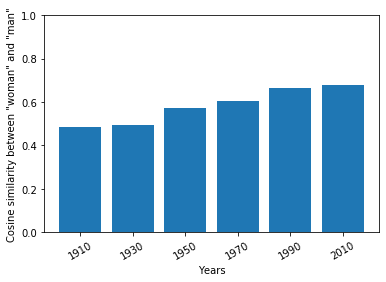

In [28]:
years = [1910, 1930, 1950, 1970, 1990, 2010]

index = np.arange(len(years))
plt.bar(index, woman_man_sim)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Cosine similarity between "woman" and "man"', fontsize=10)
plt.xticks(index, years, fontsize=10, rotation=30)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [29]:
women_men_sim = []

women_men_sim.append(m1.similarity('women', 'men'))
women_men_sim.append(m2.similarity('women', 'men'))
women_men_sim.append(m3.similarity('women', 'men'))
women_men_sim.append(m4.similarity('women', 'men'))
women_men_sim.append(m5.similarity('women', 'men'))
women_men_sim.append(m6.similarity('women', 'men'))

C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipyke

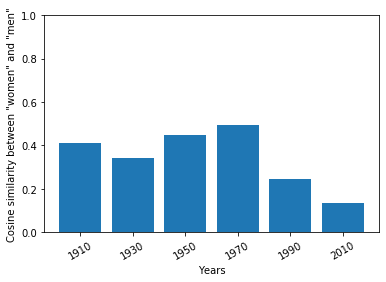

In [30]:
years = [1910, 1930, 1950, 1970, 1990, 2010]

index = np.arange(len(years))
plt.bar(index, women_men_sim)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Cosine similarity between "women" and "men"', fontsize=10)
plt.xticks(index, years, fontsize=10, rotation=30)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [22]:
sim = []

sim.append(m1.similarity('asian', 'canadian'))
sim.append(m2.similarity('asian', 'canadian'))
sim.append(m3.similarity('asian', 'canadian'))
sim.append(m4.similarity('asian', 'canadian'))
sim.append(m5.similarity('asian', 'canadian'))
sim.append(m6.similarity('asian', 'canadian'))

C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipyke

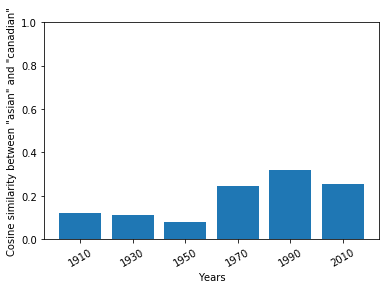

In [24]:
years = [1910, 1930, 1950, 1970, 1990, 2010]

index = np.arange(len(years))
plt.bar(index, sim)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Cosine similarity between "asian" and "canadian"', fontsize=10)
plt.xticks(index, years, fontsize=10, rotation=30)
#plt.title('Cosine similarity between word2vec of Conservertive Party and Liberal Party')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [25]:
sim = []
sim.append(m1.similarity('asian', 'caucasian'))
sim.append(m2.similarity('asian', 'caucasian'))
sim.append(m3.similarity('asian', 'caucasian'))
sim.append(m4.similarity('asian', 'caucasian'))
sim.append(m5.similarity('asian', 'caucasian'))
sim.append(m6.similarity('asian', 'caucasian'))

C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """
C:\Users\Jungeun (June) Lim\Anaconda3\lib\site-packages\ipyke

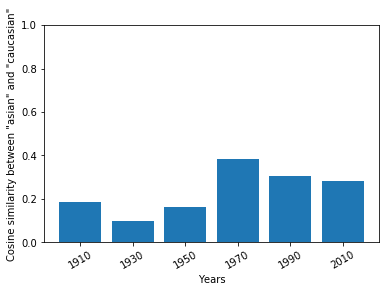

In [26]:
years = [1910, 1930, 1950, 1970, 1990, 2010]

index = np.arange(len(years))
plt.bar(index, sim)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Cosine similarity between "asian" and "caucasian"', fontsize=10)
plt.xticks(index, years, fontsize=10, rotation=30)
#plt.title('Cosine similarity between word2vec of Conservertive Party and Liberal Party')
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()